# 📞 Customer Churn Prediction using Machine Learning

This project focuses on predicting whether a customer is likely to churn based on demographic details, service usage, and account information.

The objective is to build and evaluate machine learning models that can help businesses identify at-risk customers and take preventive actions.

In [2]:
import pandas as pd
import numpy as np

## 📊 Step 1: Data Loading & Dataset Description

The dataset is loaded into a pandas DataFrame for analysis.  
Each row represents a single record, and columns represent different features.

The target variable indicates the outcome that the model aims to predict.

In [3]:
# Step 1: Load the dataset
data = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Step 2: Display the first few rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 🔍 Step 2: Exploratory Data Analysis (EDA)

Exploratory Data Analysis is performed to understand the structure, distribution, and patterns within the dataset.

This step helps identify relationships between features, detect anomalies, and gain insights that guide preprocessing and model selection.

In [2]:
# Basic info about the dataset
data.info()

# Check missing values
data.isnull().sum()

# Quick statistics for numeric columns
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [3]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up default style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

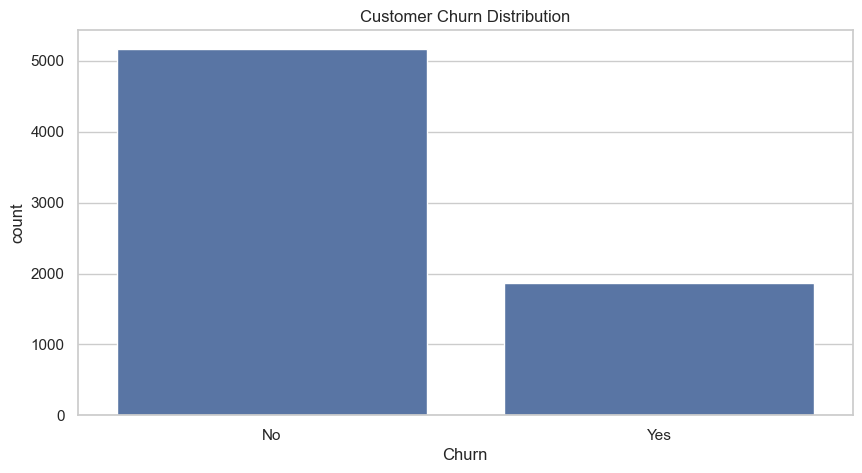

In [5]:
sns.countplot(x='Churn', data=data)
plt.title("Customer Churn Distribution")
plt.show()

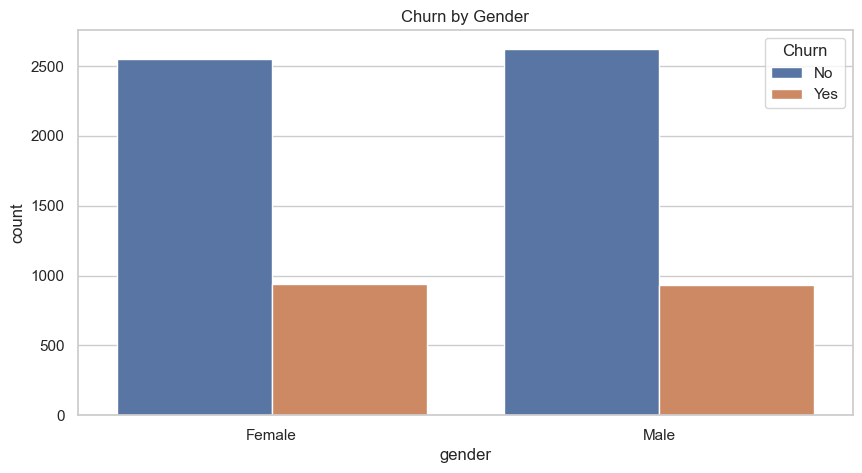

In [6]:
sns.countplot(x='gender', hue='Churn', data=data)
plt.title("Churn by Gender")
plt.show()

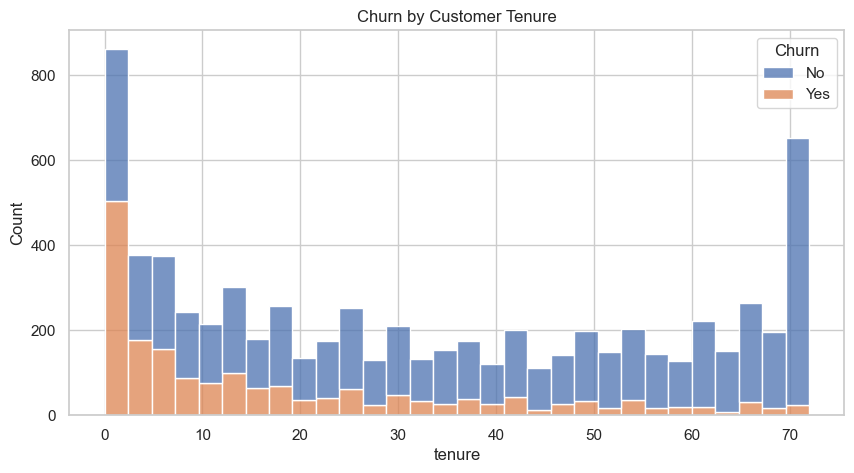

In [7]:
sns.histplot(data=data, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title("Churn by Customer Tenure")
plt.show()

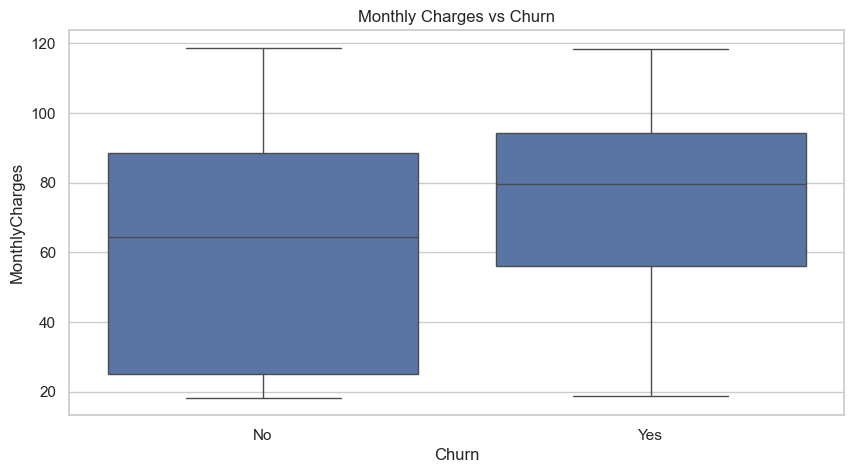

In [8]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title("Monthly Charges vs Churn")
plt.show()

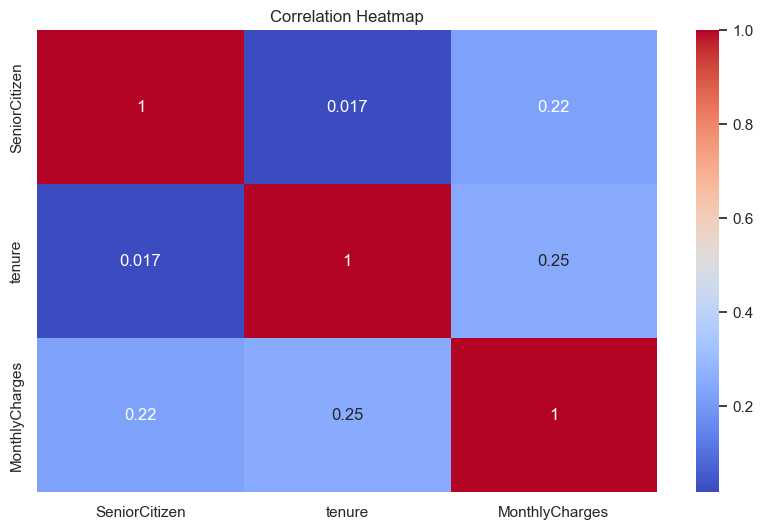

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# Check again for missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# Convert TotalCharges to numeric, forcing errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Now check again for missing values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## 🧹 Step 3: Data Preprocessing

In this step, the dataset is cleaned and prepared for model training.

This includes handling missing values, encoding categorical variables, and transforming features into a suitable numerical format.

In [13]:
# Fix for the warning — reassign the column after filling NaN
data['TotalCharges'] = data['TotalCharges'].fillna(0)

In [14]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
data.drop('customerID', axis=1, inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder

df = data.copy()

for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## 🧩 Step 4: Feature Engineering & Feature Selection

In this step, relevant input features are selected and separated from the target variable.

This prepares the dataset in a structured format suitable for machine learning model training.

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (5634, 19)
Testing data shape: (1409, 19)
Training labels shape: (5634,)
Testing labels shape: (1409,)


## 🤖 Step 5: Model Training

In this step, machine learning models are trained using the prepared feature set.

Different classification algorithms are applied to learn patterns in the data and predict customer churn.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Create the model
model = LogisticRegression(max_iter=1000)

# Step 2: Train (fit) the model
model.fit(X_train, y_train)

# Step 3: Predict on test data
y_pred = model.predict(X_test)

# Step 4: Evaluate performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc, 4))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8162

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


Confusion Matrix:
 [[934 102]
 [157 216]]


D:\customer-churn-prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# Logistic Regression with more iterations and solver fix
model = LogisticRegression(max_iter=2000, solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Recheck performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8162

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


Confusion Matrix:
 [[933 103]
 [156 217]]


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Create and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 2: Make predictions
y_pred_dt = dt_model.predict(X_test)

# Step 3: Evaluate performance
print("Decision Tree Accuracy:", round(accuracy_score(y_test, y_pred_dt), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7253

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1036
           1       0.48      0.51      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409


Confusion Matrix:
 [[833 203]
 [184 189]]


In [22]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Make predictions
y_pred_rf = rf_model.predict(X_test)

# Step 3: Evaluate performance
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.7949

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Confusion Matrix:
 [[944  92]
 [197 176]]


## 🔍 Step 6: Model Comparison

In this step, the performance of different machine learning models is compared
to identify the best model for customer churn prediction.

The models are evaluated using accuracy and classification metrics.
This comparison helps in selecting the most effective model for deployment.

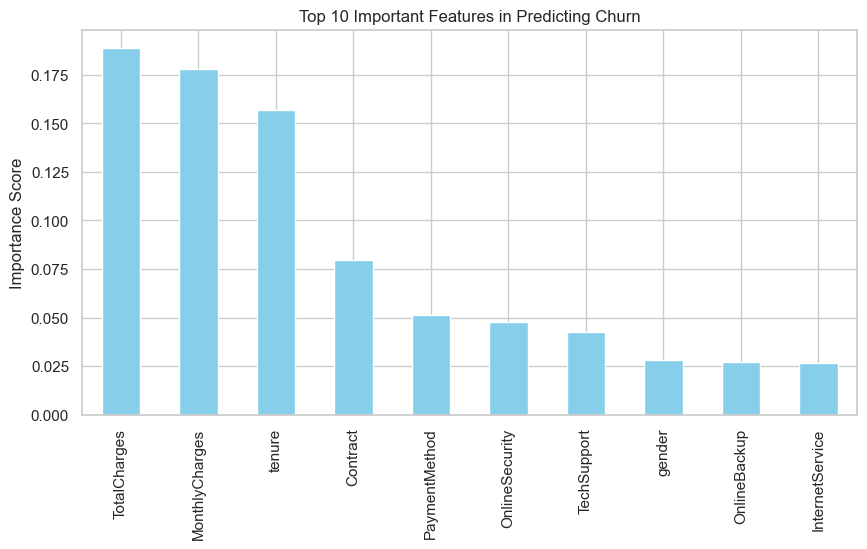

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Important Features in Predicting Churn")
plt.ylabel("Importance Score")
plt.show()

## 🤖 Step 7: Best Model Selection & Model Saving

Based on the evaluation results, the Random Forest model demonstrates better performance compared to other models.
It effectively captures complex patterns in the data and provides feature importance scores, making it suitable
for deployment.

The trained Random Forest model is saved to disk for later use in the Streamlit application.

In [24]:
import joblib

# Save the Random Forest model
joblib.dump(rf_model, '../models/churn_model.pkl')

print("✅ Model saved successfully!")

✅ Model saved successfully!


## ✅ Conclusion & Key Learnings

In this project, a complete end-to-end machine learning pipeline was developed to predict customer churn.
The workflow included data exploration, preprocessing, feature engineering, model training, evaluation,
and final model selection.

Among the evaluated models, Random Forest achieved the best overall performance and provided meaningful
feature importance insights, making it suitable for deployment in a real-world scenario.